# Box Concatenate Test

This notebook is to test concatentating lots of separate netcdf files into one netcdf or zarr file. I will test the functionality using the smaller scale tests located in `/swot/SUM05/amf2288/sync-boxes/test_boxes`. This was entirely written by chatGPT, I should comb through it later to make sure I understand what's going on. Also it could probably be written a little simpler.

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import argopy
import scipy.ndimage as filter
import scipy
import matplotlib
import gsw
from pathlib import Path
import cartopy.crs as ccrs

import dask
from dask.diagnostics import ProgressBar

In [4]:
def concatenate_netcdf(input_dir: str, first_dim: str, second_dim: str, output_dir: str, output_file: str):
    input_path = Path(input_dir)
    netcdf_files = list(input_path.glob("*.nc"))
    
    # Create the output directory if it doesn't exist
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Open datasets lazily with dask
    datasets = [xr.open_dataset(str(file), chunks={}) for file in netcdf_files]
    
    # Concatenate along the first dimension
    combined_first_dim = xr.concat(datasets, dim=first_dim)
    
    # Rechunk the data to ensure uniform chunk sizes
    combined_rechunked = combined_first_dim.chunk({first_dim: 256, second_dim: 256})  # Adjust chunk sizes as needed
    
    # Save to NetCDF
    output_file_path = output_path / output_file
    with ProgressBar():
        combined_rechunked.to_netcdf(output_file_path, compute=True)

def concatenate_zarr(input_dir: str, first_dim: str, second_dim: str, output_dir: str, output_file: str):
    input_path = Path(input_dir)
    netcdf_files = list(input_path.glob("*.nc"))
    
    # Create the output directory if it doesn't exist
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Open datasets lazily with dask
    datasets = [xr.open_dataset(str(file), chunks={}) for file in netcdf_files]
    
    # Concatenate along the first dimension
    combined_first_dim = xr.concat(datasets, dim=first_dim)
    
    # Rechunk the data to ensure uniform chunk sizes
    combined_rechunked = combined_first_dim.chunk({first_dim: 256, second_dim: 256})  # Adjust chunk sizes as needed
    
    # Save to Zarr
    output_file_path = output_path / output_file
    with ProgressBar():
        combined_rechunked.to_zarr(output_file_path, compute=True)

In [5]:
# Example usage
input_directory = "/swot/SUM05/amf2288/sync-boxes/test_error"
output_directory = "/swot/SUM05/amf2288/sync-boxes"
output_netcdf = "test_error.nc"
output_zarr = "test_error.zarr"
first_dim = "N_PROF"
second_dim = "PRES_INTERPOLATED"

In [21]:
# Concatenate along both dimensions and save to NetCDF
concatenate_netcdf(input_directory, first_dim, second_dim, output_directory, output_netcdf)

[########################################] | 100% Completed | 27.49 s


In [7]:
# Concatenate along both dimensions and save to Zarr
#concatenate_zarr(input_directory, first_dim, second_dim, output_directory, output_zarr)

[########################################] | 100% Completed | 1.14 s


In [6]:
ds = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/test_error.nc')

In [7]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:            (N_PROF: 53723, PRES_INTERPOLATED: 1000)
Coordinates:
    TIME               (N_PROF) datetime64[ns] 430kB ...
    LATITUDE           (N_PROF) float64 430kB ...
    LONGITUDE          (N_PROF) float64 430kB ...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 8kB 0 2 4 6 ... 1994 1996 1998
  * N_PROF             (N_PROF) int64 430kB 48 55 61 434 437 ... 678 652 780 828
    N_PROF_NEW         (N_PROF) int64 430kB ...
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 430MB ...
    CYCLE_NUMBER       (N_PROF) int64 430kB ...
    DATA_MODE          (N_PROF) <U1 215kB ...
    DIRECTION          (N_PROF) <U1 215kB ...
    PLATFORM_NUMBER    (N_PROF) int64 430kB ...
    PRES               (N_PROF, PRES_INTERPOLATED) float32 215MB ...
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 215MB ...
    SA                 (N_PROF, PRES_INTERPOLATED) float64 430MB ...
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 430MB ...
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 215MB ...
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 215MB ...
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 430MB ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://data-argo.ifremer.fr
    Fetched_by:           amf2288
    Fetched_date:         2025/02/10
    Fetched_constraints:  [x=-40.00/-35.00; y=-5.00/0.00; z=0.0/2000.0]
    Fetched_uri:          https://data-argo.ifremer.fr/dac/aoml/15819/15819_p...
    Valid uris:           ['https://data-argo.ifremer.fr/dac/bodc/3900560/390...
    All uris:             ['https://data-argo.ifremer.fr/dac/aoml/15819/15819...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

In [9]:
#xr.open_zarr('/swot/SUM05/amf2288/sync-boxes/test_concat/test_out.zarr')

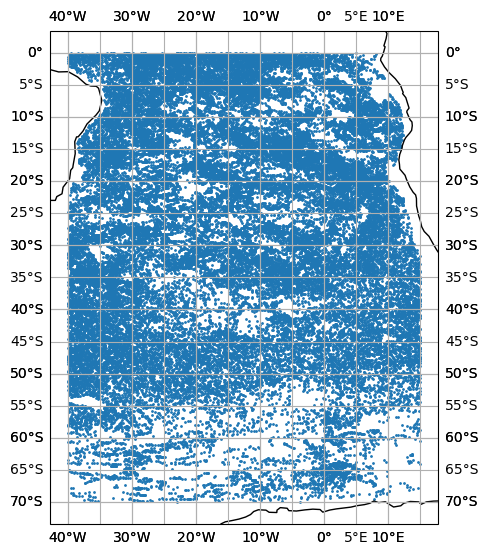

In [24]:
fig = plt.figure(figsize=(5, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.scatter(ds.LONGITUDE,ds.LATITUDE,transform=ccrs.PlateCarree(),color='tab:blue',s=1)
ax.gridlines(xlocs=np.arange(-80,30,5), ylocs=np.arange(-90,90,5), draw_labels=True)

In [26]:
test = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/test_error/lon:(-35,-30)_lat:(-5,0)_ds_z.nc')

In [52]:
len(np.unique(test.attrs['Valid uris']))

118

In [50]:
len(np.unique(test.attrs['All uris']))

125

In [8]:
# Initialize the total count
valid_count = 0
all_count = 0

# Iterate over all NetCDF files in the directory
for filename in os.listdir(input_directory):
    if filename.endswith('.nc'):
        file_path = os.path.join(input_directory, filename)
        # Open the NetCDF file
        ds = xr.open_dataset(file_path)
        # Calculate the metric
        valid_uris = len(np.unique(ds.attrs['Valid uris']))
        all_uris = len(np.unique(ds.attrs['All uris']))
        # Increase the total count by the metric value
        valid_count += valid_uris
        all_count += all_uris

In [10]:
print("TOTAL number of profiles in this region: {}".format(all_count))
print("Number of VALID profiles in this region: {}".format(valid_count))
print("Number of INVALID profiles in this region: {}".format(all_count - valid_count))
print("Percent of INVALID profiles: {}".format(((all_count - valid_count)/all_count)*100))

TOTAL number of profiles in this region: 18094
Number of VALID profiles in this region: 17989
Number of INVALID profiles in this region: 105
Percent of INVALID profiles: 0.5803028628274566
